In [1]:
%%bash 
which python

/global/project/projectdirs/atlas/xju/miniconda3/envs/py3.6/bin/python


In [2]:
import sys
sys.path.append('..')
from nx_graph.utils_test import create_trained_model
from nx_graph.utils_test import plot_metrics

In [5]:
config_file = '../configs/nxgraph_default.yaml'
input_ckpt = '../trained_results/nxgraph_big_000/bak'
model = create_trained_model(config_file, input_ckpt)

Total Events: 6467 with 16 sections, total 103472 files 
Training data: [0, 4525] events, total 72416 files
Testing data:  [4526, 6467] events, total 31056 files


In [6]:
iteration = 13010

In [10]:
odd, tdd = model(iteration)

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_big_000/bak/checkpoint_13010.ckpt


Accuracy:  0.9922
Precision: 0.9750
Recall:    0.9288


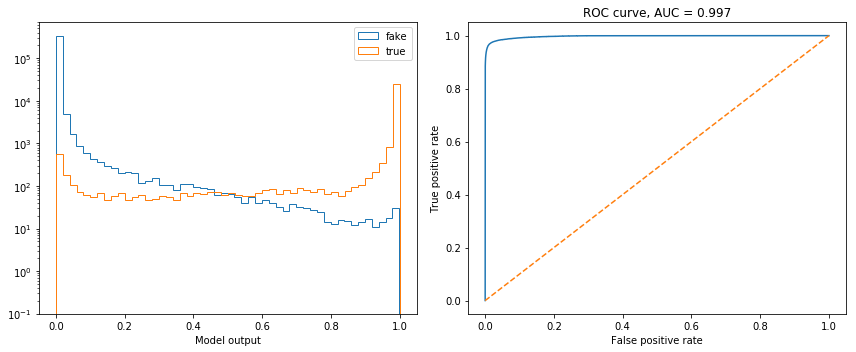

In [11]:
plot_metrics(odd, tdd, odd_th=0.5)

Accuracy:  0.9921
Precision: 0.9742
Recall:    0.9279


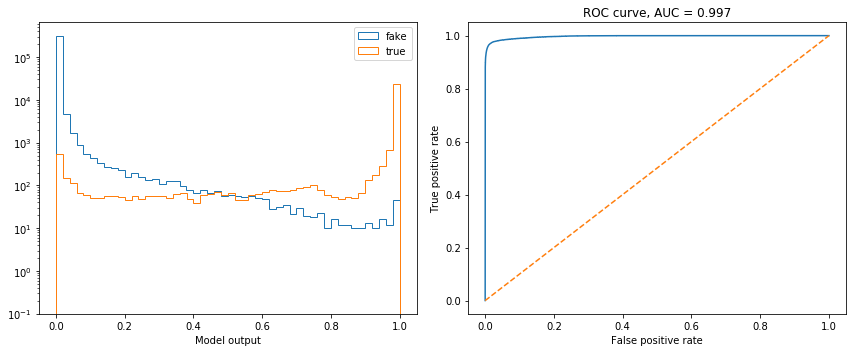

In [9]:
plot_metrics(odd, tdd, odd_th=0.5)

Accuracy:  0.9663
Precision: 0.9424
Recall:    0.9172


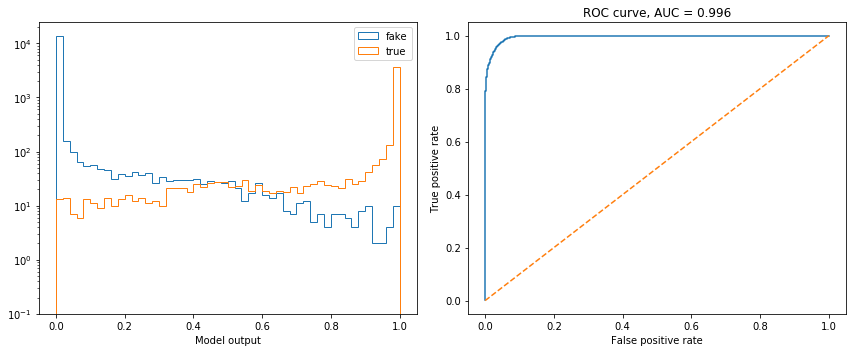

In [7]:
plot_metrics(odd, tdd, odd_th=0.5)

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_small_decoder_001/bak/checkpoint_24869.ckpt
Accuracy:  0.9771
Precision: 0.9583
Recall:    0.9605


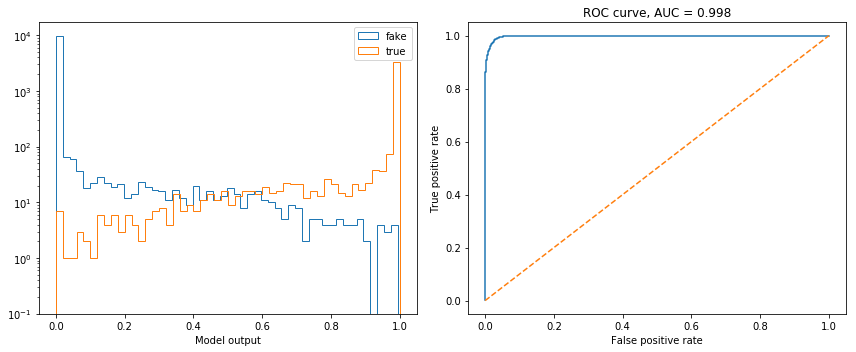

In [12]:
iteration = 24869
odd, tdd = model(iteration)
plot_metrics(odd, tdd, odd_th=0.5)